In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from numpy.ma.core import sqrt
from sklearn.cluster import KMeans

In [18]:
# dataset example
x_values = [2, 3, 3, 4, 6, 7, 8, 9]
y_values = [3, 4, 6, 4, 8, 6, 6, 8]

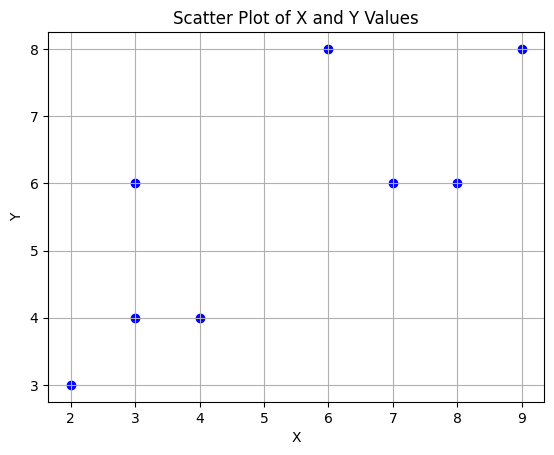

In [19]:
plt.scatter(x_values, y_values, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y Values')
plt.grid(True)
plt.show()

In [57]:
k=2

In [61]:
def k_means(x_values, y_values, k):
    cluster_means = []
    centroids = random.sample(range(len(x_values)), k)

    #data points with no cluster assigned
    unclustered = [i for i in range(len(x_values)) if i not in centroids]

    #initialize clusters
    clusters = [[c] for c in centroids]

    centroid_values = []
    for i in range(k):
        centroid_values.append((x_values[centroids[i]], y_values[centroids[i]]))

    while centroid_values != cluster_means:
        for d in unclustered:
            min_dist = float('inf')
            cent_min = -1

            #calculate distances from the data point to each centroid
            for c in range(len(centroids)):
                dist = sqrt((x_values[d] - x_values[centroids[c]])**2 + (y_values[d] - y_values[centroids[c]])**2)

                if dist < min_dist:
                    min_dist = dist
                    cent_min = c

            #assign the data point to the closest cluster
            clusters[cent_min].append(d)

        #calculate the mean of each cluster
        cluster_means = []
        for cluster in clusters:
            cluster_x = [x_values[i] for i in cluster]
            cluster_y = [y_values[i] for i in cluster]
            mean_x = sum(cluster_x) / len(cluster_x)
            mean_y = sum(cluster_y) / len(cluster_y)
            cluster_means.append((mean_x, mean_y))

        centroid_values = cluster_means
    return centroid_values


final_centroid_values = k_means(x_values, y_values, k)
print("Centroid values:", final_centroid_values)


Centroid values: [(6.8, 6.4), (2.6666666666666665, 4.333333333333333)]


In [53]:
data = np.array(list(zip(x_values, y_values)))
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
print("Sklearn centroids:", centroids)

Sklearn centroids: [[7.5  7.  ]
 [3.   4.25]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
